In [22]:
import pandas as pd
import matplotlib.pyplot as plt

lappis_data = pd.read_csv('../extract_contributions/contributors_summary_lappis.csv')
eps_data = pd.read_csv('../extract_contributions/contributors_summary_eps_mds.csv')

display(lappis_data.head(), eps_data.head())



,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,User,1,11,C,"{'2023-06': 0, '2023-07': 0, '2023-08': 0, '20...","{'commits': 1, 'pull_requests': 0, 'issues': 0..."
1,davidCarlos,22,24,Python,"{'2023-06': 0, '2023-07': 0, '2023-08': 0, '20...","{'commits': 22, 'pull_requests': 0, 'issues': ..."
2,StrangeUnit28,278,15,Python,"{'2023-06': 105, '2023-07': 57, '2023-08': 1, ...","{'commits': 207, 'pull_requests': 20, 'issues'..."
3,MaiconMares,441,41,JavaScript,"{'2023-06': 34, '2023-07': 74, '2023-08': 30, ...","{'commits': 106, 'pull_requests': 16, 'issues'..."
4,PauloGoncalvesLima,202,26,Python,"{'2023-06': 39, '2023-07': 34, '2023-08': 4, '...","{'commits': 79, 'pull_requests': 2, 'issues': ..."


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,User,1,11,C,"{'2023-06': 0, '2023-07': 0, '2023-08': 0, '20...","{'commits': 1, 'pull_requests': 0, 'issues': 0..."
1,Juhvitoria4,69,9,Python,"{'2023-06': 5, '2023-07': 2, '2023-08': 9, '20...","{'commits': 56, 'pull_requests': 3, 'issues': ..."
2,LucasLopesFrazao,2157,18,Java,"{'2023-06': 126, '2023-07': 90, '2023-08': 127...","{'commits': 128, 'pull_requests': 8, 'issues':..."
3,thiagompc,458,45,Python,"{'2023-06': 73, '2023-07': 36, '2023-08': 0, '...","{'commits': 90, 'pull_requests': 3, 'issues': ..."
4,senaarth,614,38,TypeScript,"{'2023-06': 146, '2023-07': 189, '2023-08': 99...","{'commits': 255, 'pull_requests': 6, 'issues':..."


### Análise Descritiva

A análise descritiva fornece um resumo estatístico dos dados de contribuições e repositórios para cada grupo. Esta análise inclui métricas como média, desvio padrão, valores mínimos e máximos, e percentis. Essas informações ajudam a entender a distribuição e a variação das contribuições e repositórios em cada grupo.


In [23]:
lappis_summary = lappis_data.describe()

eps_summary = eps_data.describe()

display(lappis_summary, eps_summary)

,contributions,repositories
count,79.000000,79.000000
mean,375.063291,36.544304
std,668.681449,32.897977
min,0.000000,0.000000
25%,40.500000,13.500000
50%,188.000000,30.000000
75%,337.000000,45.500000
max,4667.000000,167.000000


,contributions,repositories
count,503.000000,503.000000
mean,415.811133,32.200795
std,953.432561,47.795687
min,0.000000,0.000000
25%,69.000000,13.000000
50%,173.000000,24.000000
75%,358.000000,38.000000
max,12163.000000,802.000000


### Normalização dos Dados

Para garantir uma comparação justa entre os dois grupos, é necessário normalizar os dados. A normalização é importante porque o número de alunos no grupo do laboratório é menor do que no grupo das disciplinas. Sem a normalização, as análises poderiam ser tendenciosas, favorecendo o grupo com mais alunos. A normalização permite que comparações sejam feitas de forma proporcional, considerando a diferença no tamanho dos grupos.

### Normalização por Usuário

A normalização por usuário envolve calcular as contribuições e repositórios por usuário em cada grupo. Isso permite uma comparação direta entre os grupos, independente do número total de alunos em cada grupo.

### Comparação das Métricas Normalizadas

A comparação das métricas normalizadas entre os grupos do laboratórios e o de disciplinas é apresentada em um dataframe. Isso ajuda a visualizar a diferença nas contribuições e repositórios médios por usuário entre os dois grupos.


In [24]:
lappis_data['contributions_per_user'] = lappis_data['contributions'] / len(lappis_data)
eps_data['contributions_per_user'] = eps_data['contributions'] / len(eps_data)

lappis_data['repositories_per_user'] = lappis_data['repositories'] / len(lappis_data)
eps_data['repositories_per_user'] = eps_data['repositories'] / len(eps_data)

normalized_metrics = pd.DataFrame({
    'Lappis_Avg_Contributions_Per_User': [lappis_data['contributions_per_user'].mean()],
    'EPS_Avg_Contributions_Per_User': [eps_data['contributions_per_user'].mean()],
    'Lappis_Avg_Repositories_Per_User': [lappis_data['repositories_per_user'].mean()],
    'EPS_Avg_Repositories_Per_User': [eps_data['repositories_per_user'].mean()],
})

display(normalized_metrics)

,Lappis_Avg_Contributions_Per_User,EPS_Avg_Contributions_Per_User,Lappis_Avg_Repositories_Per_User,EPS_Avg_Repositories_Per_User
0,4.747637,0.826662,0.462586,0.064017


### Gráfico de Distribuição das Contribuições Totais

Este gráfico mostra a distribuição do número total de contribuições feitas pelos alunos em cada grupo. Ele ajuda a visualizar a variação nas contribuições entre os alunos de cada grupo.


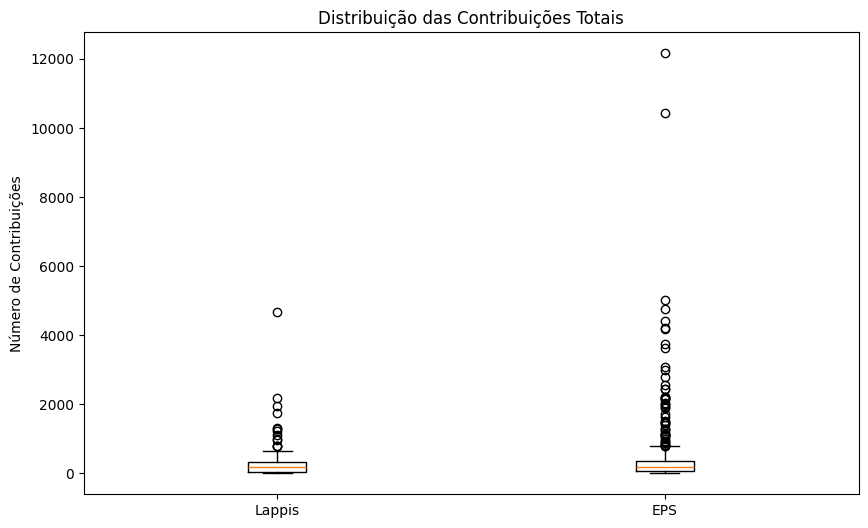

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot([lappis_data['contributions'], eps_data['contributions']], labels=['Lappis', 'EPS'])
plt.title('Distribuição das Contribuições Totais')
plt.ylabel('Número de Contribuições')
plt.show()

### Gráfico de Distribuição dos Repositórios Totais

Este gráfico mostra a distribuição do número total de repositórios em que os alunos contribuíram em cada grupo. Ele ajuda a visualizar a variação no envolvimento dos alunos com diferentes repositórios.


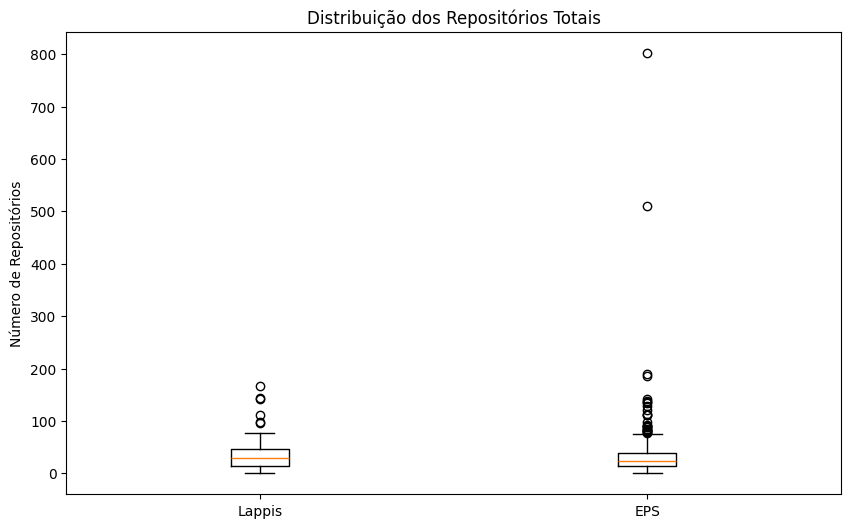

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot([lappis_data['repositories'], eps_data['repositories']], labels=['Lappis', 'EPS'])
plt.title('Distribuição dos Repositórios Totais')
plt.ylabel('Número de Repositórios')
plt.show()

### Gráfico de Contribuições Médias por Usuário

Este gráfico mostra a média das contribuições por usuário para cada grupo. Isso ajuda a visualizar a diferença na média de contribuições entre os grupos, destacando como cada grupo contribui de forma proporcional ao número de alunos.


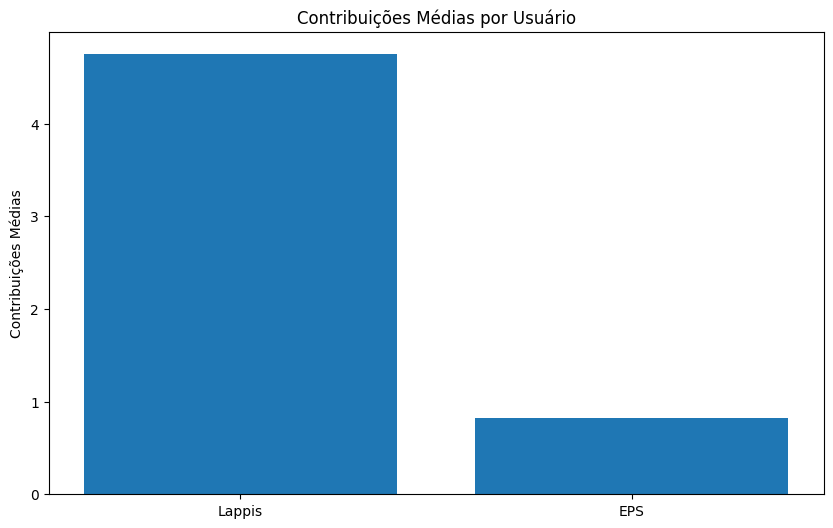

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(['Lappis', 'EPS'], [normalized_metrics['Lappis_Avg_Contributions_Per_User'][0], normalized_metrics['EPS_Avg_Contributions_Per_User'][0]])
plt.title('Contribuições Médias por Usuário')
plt.ylabel('Contribuições Médias')
plt.show()

### Gráfico de Repositórios Médios por Usuário

Este gráfico mostra a média dos repositórios por usuário para cada grupo. Ele permite comparar diretamente a quantidade média de repositórios nos quais os alunos de cada grupo estão envolvidos, oferecendo insights sobre o envolvimento em projetos.


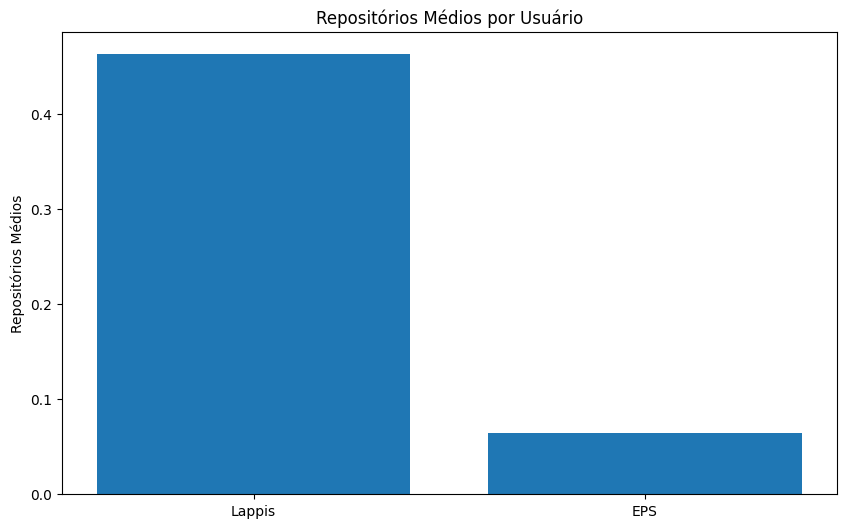

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(['Lappis', 'EPS'], [normalized_metrics['Lappis_Avg_Repositories_Per_User'][0], normalized_metrics['EPS_Avg_Repositories_Per_User'][0]])
plt.title('Repositórios Médios por Usuário')
plt.ylabel('Repositórios Médios')
plt.show()

### Gráfico de Comparação das Linguagens de Programação

Este gráfico mostra a comparação das linguagens de programação mais utilizadas por cada grupo. Ele ajuda a identificar quais linguagens são mais populares em cada grupo e como o uso das linguagens pode variar entre os grupos Lappis e EPS.

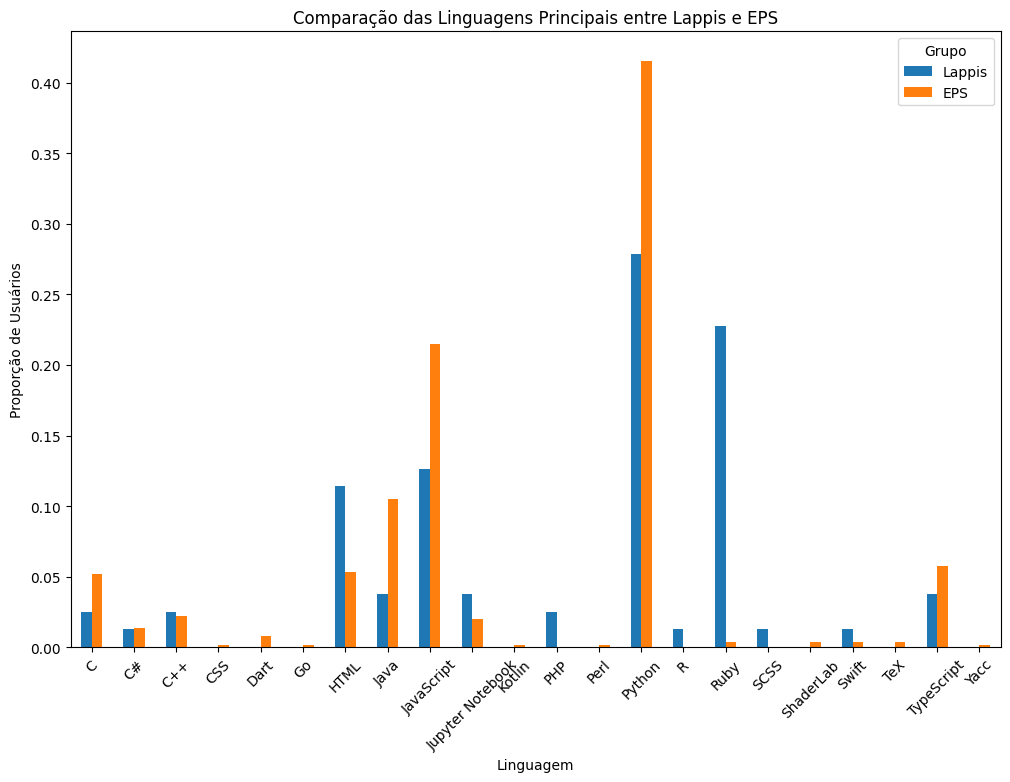

In [36]:
lappis_languages = lappis_data['primary_language'].value_counts()

eps_languages = eps_data['primary_language'].value_counts()

lappis_languages_normalized = lappis_languages / len(lappis_data)
eps_languages_normalized = eps_languages / len(eps_data)

language_comparison = pd.DataFrame({
    'Lappis': lappis_languages_normalized,
    'EPS': eps_languages_normalized
}).fillna(0)  

# display(language_comparison)

language_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Comparação das Linguagens Principais entre Lappis e EPS')
plt.xlabel('Linguagem')
plt.ylabel('Proporção de Usuários')
plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.show()

### Gráfico de Contribuições Mensais ao Longo do Tempo

Este gráfico mostra a soma das contribuições mensais ao longo do tempo para cada grupo. Ele ajuda a identificar padrões de contribuição ao longo do tempo, incluindo constância, picos e outliers nas contribuições dos alunos.

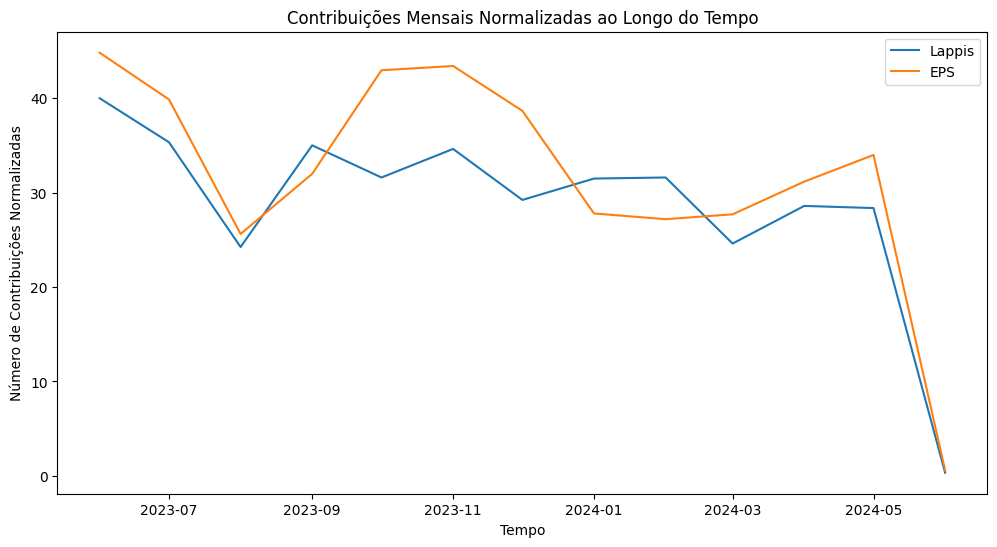

In [35]:
def parse_monthly_contributions(data, normalized_column):
    contributions_over_time = pd.DataFrame()
    for index, row in data.iterrows():
        monthly_contribs = eval(row['monthly_contributions'])
        temp_df = pd.DataFrame.from_dict(monthly_contribs, orient='index', columns=['contributions'])
        temp_df['contributions'] = temp_df['contributions'] / len(data)  # Normalizar contribuições
        temp_df['user'] = row['user']
        contributions_over_time = pd.concat([contributions_over_time, temp_df])
    contributions_over_time.index = pd.to_datetime(contributions_over_time.index)
    return contributions_over_time

lappis_contributions_over_time = parse_monthly_contributions(lappis_data, 'contributions_per_user')
eps_contributions_over_time = parse_monthly_contributions(eps_data, 'contributions_per_user')

lappis_monthly_sum = lappis_contributions_over_time.groupby(lappis_contributions_over_time.index).sum()
eps_monthly_sum = eps_contributions_over_time.groupby(eps_contributions_over_time.index).sum()

lappis_monthly_sum.index = pd.to_datetime(lappis_monthly_sum.index)
eps_monthly_sum.index = pd.to_datetime(eps_monthly_sum.index)

plt.figure(figsize=(12, 6))
plt.plot(lappis_monthly_sum.index, lappis_monthly_sum['contributions'], label='Lappis')
plt.plot(eps_monthly_sum.index, eps_monthly_sum['contributions'], label='EPS')
plt.title('Contribuições Mensais Normalizadas ao Longo do Tempo')
plt.ylabel('Número de Contribuições Normalizadas')
plt.xlabel('Tempo')
plt.legend()
plt.show()
